# Imports

In [1]:

# coding: utf-8

# # Imports

# ## Qutip imports 1

# In[1]:


from qutip.operators import sigmax, sigmay, sigmaz, identity
# position, momentum, num, create, destroy, commutator, qeye 
from qutip.tensor import tensor
from qutip.qip.gates import swap, rx, ry, rz
from qutip.qobj import Qobj
from qutip.visualization import hinton
from qutip.visualization import matrix_histogram_complex, matrix_histogram
from qutip.random_objects import rand_herm, rand_unitary, rand_dm


# ## Qutip imports 2

# In[2]:


#from 


# ## Numpy imports 

# In[2]:


from numpy import sin, cos, tan, real, imag,  log, conj
from numpy import array, append, linspace, arange
from numpy import add, sqrt, abs, dot
from numpy.random import random, random_sample, rand, seed, RandomState
from numpy import concatenate, trace, diag
from numpy import ones, zeros, ones_like, zeros_like
from numpy import amax, amin, nanmax, nanmin
from numpy import outer, multiply
# from numpy import pi


# ## Scipy imports

# In[17]:


from scipy.integrate import ode, odeint, complex_ode
from scipy.optimize import minimize
from scipy.linalg import eigh, inv, norm, expm
# from scipy.linalg import 
# from scipy import


# ## Matplotlib imports

# In[18]:


from matplotlib.pyplot import plot, figure, show, savefig, axes
from matplotlib.pyplot import xlabel, ylabel, title, legend
from matplotlib import rcParams
from matplotlib.pyplot import style 
from matplotlib.pyplot import xlim, ylim, axis 
# beware not same as axes
from matplotlib.pyplot import subplot, subplots, text
from matplotlib.pyplot import GridSpec
from matplotlib.pyplot import scatter, colorbar


pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
rcParams.update(pgf_with_rc_fonts)
style.use('seaborn-whitegrid')


# ## Math imports

# In[19]:


from math import pi
from math import exp


# ## Cmath imports

# ## Date and datetime imports

# In[20]:


from datetime import date
from datetime import datetime# now


# ## Os imports

# In[21]:


from os import getcwd, mkdir, chdir
from os.path import abspath, join 


# ## Sympy imports

# In[22]:


from sympy import Function, dsolve, Eq, Derivative, symbols
# x, y, z, t = symbols('x y z t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)


# ## Miscellaneous imports

# ## Extra useful functions

# In[23]:


def rint(x):
    print("x = ", x)
    return None


# # Next chapter

# ## sub topic 1

# ## sub topic 2

# ## sub topic 3

# ### sub sub topic 1



# Building parts

## memory wiping

In [2]:
 %reset_selective -f  omega_1, total_time, epsilon, max_iter, time_steps, dt

In [3]:
%reset_selective -f Lin, Ti,I

## Building the Hamiltonians

In [4]:
def H1(omega_1):
    r"""Building the bare Hamiltonian"""
    H1 = omega_1*sigmaz()
    return H1

In [5]:
def H2():
    r"""Building the Interaction Hamiltonian"""
    H2 = sigmay()
    return H2

In [6]:
def Hamil(omega_1, xi):
    H = H1(omega_1) + xi*H2()
    return H

In [7]:
Hamil(2, 0.5 )

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 2.+0.j   0.-0.5j]
 [ 0.+0.5j -2.+0.j ]]

## Transforming  the Target Unitary

In [8]:
def T_maker(Ti):
    r"""Moving the target from Hilbert space to Liouville space"""
    T = tensor(Ti.trans(), Ti)
    return T

In [9]:
 tensor(identity(2), T_maker(sigmax()))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

## Building $A(t)$

In [10]:
def leftover(Lin):
    r"""part of $A(t)$ that depends on Linbladian operators"""
    d = Lin.shape[0]
    I = identity(d)
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    leftover = 1j*(0)*(term1 - 0.5*(term2 + term3)) #gamma = 0.1
    return leftover


def A(omega_1, xi, Lin):
    r"""making $A(t)$"""
    H = Hamil(omega_1, xi)
    d = Lin.shape[0]
    I = identity(d)
    A = tensor(I, H) - tensor((H.conj()), I) + leftover(Lin)
    return A

In [11]:
A(2, 0.5, sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -4.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   4.+0.j   0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

In [12]:
A(0, 0.5, sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.+0.j  0.-0.5j 0.-0.5j 0.+0.j ]
 [0.+0.5j 0.+0.j  0.+0.j  0.-0.5j]
 [0.+0.5j 0.+0.j  0.+0.j  0.-0.5j]
 [0.+0.j  0.+0.5j 0.+0.5j 0.+0.j ]]

## Building $X_{k}$ 

In [13]:
def x_k(omega_1, Lin ):
    r"""Building the derivative of $X_{k}$"""
    d = Lin.shape[0]
    I = identity(d)
    x_k = tensor(I, H2()) - tensor((H2().conj()), I) #+ leftover(Lin)
    return x_k

In [14]:
x_k(0.5, sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j 0.-1.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+1.j 0.+1.j 0.+0.j]]

## Building $L(t)$ and the Identity in the Liouville space

In [15]:
def L(omega_1, xi, Lin, dt):
    r"""Making $L(t) from $A(t)$"""
    L = (-1j*A(omega_1, xi, Lin)*dt).expm()
    return L

In [16]:
L(0.5, 2, sigmaz(), 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99996000e-01+0.00000000e+00j -1.99999433e-03-9.99998583e-07j
  -1.99999433e-03+9.99998583e-07j  3.99999433e-06+0.00000000e+00j]
 [ 1.99999433e-03+9.99998583e-07j  9.99995500e-01+9.99997167e-04j
  -3.99999433e-06+0.00000000e+00j -1.99999433e-03-9.99998583e-07j]
 [ 1.99999433e-03-9.99998583e-07j -3.99999433e-06+0.00000000e+00j
   9.99995500e-01-9.99997167e-04j -1.99999433e-03+9.99998583e-07j]
 [ 3.99999433e-06+0.00000000e+00j  1.99999433e-03+9.99998583e-07j
   1.99999433e-03-9.99998583e-07j  9.99996000e-01+0.00000000e+00j]]

In [17]:
def L_I(Ti):
    r"""Identity in the liouville space"""
    d = Ti.shape[0]
    I = identity(d)
    L_I = tensor(I, I)
    return L_I

In [18]:
L_I(sigmay())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

## Major functions 1

In [19]:
# building the function to optimize (optimizee)
def L_vec(omega_1, xi_vec, Lin, dt):
    r"""Building the vector of differential $L(t)$"""
    L_vec = [L(omega_1, xi, Lin, dt) for xi in xi_vec] 
    return L_vec

In [20]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    d1 = A.shape[0] # Assuming no rectangular shaped matrices
    d2 = B.shape[0] # Assuming no rectangular shaped matrices
    d = d1*d2 # Should I normalize with this?
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [21]:
def L_full_maker(Ti, omega_1, xi_vec, Lin, dt):
    r"""Building the $L(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I(Ti) # Identity for the for loop of L
    L_v = L_vec(omega_1, xi_vec, Lin, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [22]:
def F(Ti, omega_1, xi_vec, Lin, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $L(t)$"""
    L_full = L_full_maker(Ti, omega_1, xi_vec, Lin, dt)
    T = T_maker(Ti) # Transforming $T_{i}$ to liouville space
    F = real(-fidelity_calc(T, L_full))   
    return F

## Testing major functions 1

In [23]:
fidelity_calc(sigmax(), sigmay())

4.0

In [24]:
fidelity_calc(sigmay(), sigmay())

0.0

In [25]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [26]:
xi_vec_test.size

2

In [27]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [28]:
# F(Ti, omega_1, xi_vec, Lin, dt)
F(sigmax(), 0.5 , xi_vec_test, sigmaz(), 0.001)

-7.999999999998001

## Major Functions 2

In [29]:
def L_comma_k_maker(Ti, omega_1, xi_vec, k, Lin, dt):
    r"""Making of the derivative of full $L(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    L_v = L_vec(omega_1, xi_vec, Lin, dt)# Making of the full $L(t)$
    inner_part = L_I(Ti) # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k(omega_1, Lin )*L_v[k - 1]
        else:
            # Usual multiplications of $L_{k}$
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [30]:
#L_comma_k_maker(Ti, omega_1, xi_vec, k, Lin, dt)
L_comma_k_maker(sigmax(), 0.5 , xi_vec_test, 2, sigmaz(), 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991000e-01+0.00000000e+00j -2.99997950e-03-3.49998654e-06j
  -2.99997950e-03+3.49998654e-06j  8.99997025e-06+0.00000000e+00j]
 [ 2.99998050e-03+2.49999246e-06j  9.99989000e-01+1.99998633e-03j
  -8.99996975e-06+2.99999225e-09j -2.99998050e-03-2.49999246e-06j]
 [ 2.99998050e-03-2.49999246e-06j -8.99996975e-06-2.99999225e-09j
   9.99989000e-01-1.99998633e-03j -2.99998050e-03+2.49999246e-06j]
 [ 8.99997025e-06+0.00000000e+00j  2.99997950e-03+3.49998654e-06j
   2.99997950e-03-3.49998654e-06j  9.99991000e-01+0.00000000e+00j]]

In [31]:
def updater(Ti, omega_1, xi_vec, Lin, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    T = T_maker(Ti) # Transforming $T_{i}$ to liouville space
    L_full = L_full_maker(Ti, omega_1, xi_vec, Lin, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        L_comma_k = L_comma_k_maker(Ti, omega_1, xi_vec, k, Lin, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [32]:
#  updater(Ti, omega_1, xi_vec, Lin, dt, epsilon)
updater(sigmax(), 0.5 , xi_vec_test, sigmaz(), 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [33]:
def terminator(max_iter, time_steps, Ti, omega_1, Lin, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(Ti, omega_1, xi_initial, Lin, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(Ti, omega_1, xi_new_vec, Lin, dt,
                                         epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

In [34]:
omega_1 = 0.5
total_time = 10*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [35]:
Lin = sigmaz() # Lindbladian

In [36]:
Ti = sigmax() # Target unitary

In [37]:
# terminator(20, 20, Ti, omega_1, Lin, total_time)
xi_opt = terminator(max_iter, time_steps, Ti, omega_1, Lin, total_time, epsilon)
xi_opt

array([7.44612148e+02+0.j, 6.01795717e+02+0.j, 2.41348844e+02+0.j,
       7.65468989e+02+0.j, 5.49991629e+01+0.j, 4.08606952e+02+0.j,
       9.67302925e+02+0.j, 5.07047921e+02+0.j, 9.36355227e+02+0.j,
       5.51009665e+02+0.j, 6.60373012e+02+0.j, 4.59846002e+02+0.j,
       2.47878288e+02+0.j, 7.73327618e+02+0.j, 2.29378271e+02+0.j,
       6.11986282e+02+0.j, 4.71632742e+02+0.j, 1.50078786e+02+0.j,
       6.11228197e+02+0.j, 2.77966491e+02+0.j, 5.10207485e+02+0.j,
       2.58304221e+02+0.j, 3.60915108e+02+0.j, 4.77970583e+02+0.j,
       6.68201259e+01+0.j, 6.32777634e+02+0.j, 3.10361660e+00+0.j,
       5.54284911e+02+0.j, 7.38620582e+02+0.j, 3.62828062e+02+0.j,
       2.62447201e+02+0.j, 7.74217912e+02+0.j, 5.79527756e+01+0.j,
       6.45310652e+02+0.j, 9.89985866e+02+0.j, 2.48929641e+01+0.j,
       7.87984614e+02+0.j, 1.78167114e+02+0.j, 4.50841855e+02+0.j,
       5.22100587e+02+0.j, 7.81341975e+01+0.j, 1.75559437e+02+0.j,
       1.04054792e+01+0.j, 3.84972426e+01+0.j, 2.75432032e+02+

In [38]:
F(Ti, omega_1, xi_opt, Lin, dt)

-7.586228700141596

In [39]:
max_iter

10

In [40]:
T = T_maker(Ti)
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [41]:
L_full_maker(Ti, omega_1, xi_opt, Lin, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.52306437+0.j          0.4133029 +0.28044384j  0.4133029 -0.28044384j
   0.47693563+0.j        ]
 [-0.49806492+0.03740819j  0.45360958+0.26045091j -0.37349281+0.29659858j
   0.49806492-0.03740819j]
 [-0.49806492-0.03740819j -0.37349281-0.29659858j  0.45360958-0.26045091j
   0.49806492+0.03740819j]
 [ 0.47693563+0.j         -0.4133029 -0.28044384j -0.4133029 +0.28044384j
   0.52306437+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0c5fd8d0>)

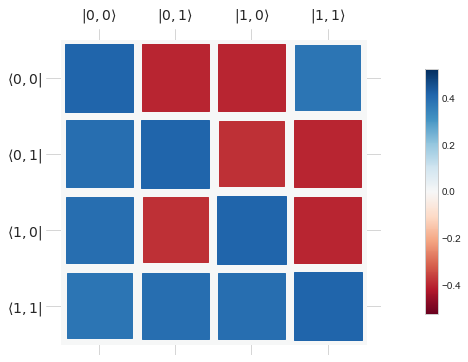

In [42]:
hinton(L_full_maker(Ti, omega_1, xi_opt, Lin, dt))